# Predicting Heart Rate using Time Series Forecasting with Python

**The Ultimate Guide for Time Series Analysis and Forecasting on Heart rate Data**


## Introduction

Sudden variations in heart rate could lead to the risks of stroke, heart failure, cardiac arrest, and also death. Preventing heart disease is important and with advancements in AI, predicting heart disease can have more accurate future predictions allowing healthcare sectors to detect and treat such situations at early stages making sure that more people can live healthy lives.

In this project, I will demonstrate and show how we can harness the power of Machine Learning and apply it in healthcare. I will walk you through the entire process of how to predict Heart rate using Time Series Forecasting with Python.

## What is Time Series Forecasting?

A time series is a sequence where a metric is recorded over regular time intervals. Depending on the frequency of observations, a time series may typically be hourly, daily, weekly, monthly, quarterly and annual.

Forecasting involves taking models fit on historical data and making predictions about the future of time series data.

## But why forecast?

Because, forecasting a time series is often of tremendous commercial value. In healthcare domain, it drives the fundamental business planning, procurement and production activities. So, it’s important to get the forecasts accurate in order to save on costs and is critical to success.


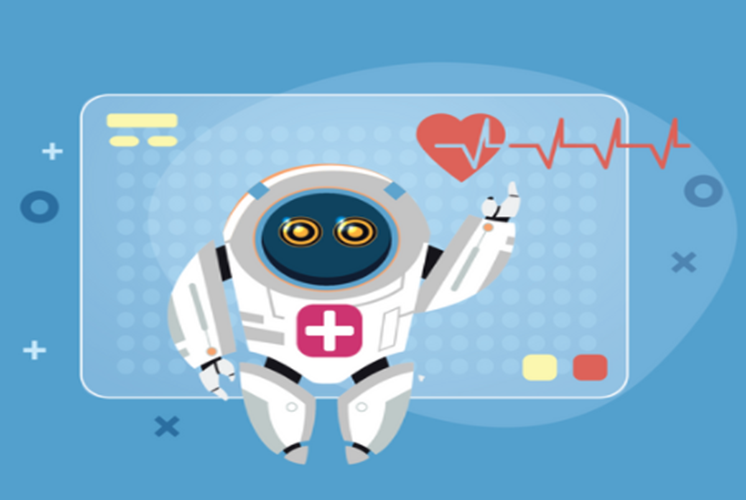

## Table of Contents

1. Load the Data
  - Import libraries
  - Load the datasets
  
2. Overview of the Data
  - Descriptive Statistics
  - Missing Values
  
3. Exploratory Data Analysis and Data Preparation
  - Handle the missing values
  - Visualize the time series using line plot
  - Check distribution of the time series
  - Check monthly seasonality using multiple lines
  - Check monthly seasonality and yearly trend using box plot
  - Decompose the time series
  - Stationarity test - Augmented Dickey Fuller test (ADH Test)
  - ACF-PACF plots and Find the order of differencing 
  
4. Model Building
  - Transform the data using box-cox transformation
  - Split data in train-test dataset
  - Model 1 - ARIMA
  - Model 2 - SARIMA
  - Model 3 - SARIMAX
  - Model 4 - Simple Exponential Smoothing
  - Model 5 - Holt-Winters
  - Define function to evaluate models
  - Train and evaluate the model
  - Save the model

## Problem Statement

The objective of this task is we are given a data set of time series collected using medical sensors, approximately four hours of data for a patient. Using these data, we will build an effective time series model to predict the next 20 observations (minutes) of heart rate data (Lifetouch Heart Rate).

## Load the Data

- Import the libraries
- Load the dataset



## Importing Libraries

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.6 MB/s 
     |████████████████████████████████| 9.8 MB 31.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# Import libraries 

# Data Manipulation
import numpy as np 
import pandas as pd
from   pandas import DataFrame

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


# Statistics

import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.special import inv_boxcox
from scipy.stats import boxcox
from scipy.interpolate import interp1d

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from dateutil.parser import parse 
import pickle

# Set the options
#pd.set_option('display.max_rows', 800)
#pd.set_option('display.max_columns', 500)
%matplotlib inline
plt.rcParams.update({'figure.figsize': (12, 8), 'figure.dpi': 100})
import warnings
warnings.filterwarnings("ignore")

## Load the datasets

In [ ]:
# Input file name with path
input_file_name = '/content/PT_Train.csv'

# Target class name
input_target_variable = 'Heart_Rate'

# Date column name
input_date_variable = 'Timestamp'

#Exogenous variable
input_exogenous_variable = 'Oximeter SpO2'

# Handle missing value
input_treat_missing_value = 'bfill' # choose how to handle missing values from 'ffill','bfill' 

# Box-cox transformation flag
input_transform_flag = 'Yes' # choose if you wish to transform the data - 'Yes' or 'No'

# Seasonality
input_seasonality = 12
input_order = (0, 1 , 2)
input_seasonal_order = (2, 1, 0, input_seasonality)

# Forecasting algorithm
 # choose the forecasting algorithm from 'auto_arima', 'auto_sarima', 'auto_sarimax', 'manual_sarima', 'simple_exponential_smoothing' and 'holt_winters'
input_ts_algo = 'auto_arima'

In [ ]:
# Read data in form of a csv file
df = pd.read_csv(input_file_name)

df[input_date_variable] = pd.to_datetime(df[input_date_variable])
df['Heart_Rate'] = df['Heart_Rate'].astype(float)

# First 5 rows of the dataset
df.head()

,Timestamp,Heart_Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,2015-08-17 15:09:00,139.0,41,NaN,NaN
1,2015-08-17 15:10:00,144.0,40,92.0,140.0
2,2015-08-17 15:11:00,140.0,42,89.0,144.0
3,2015-08-17 15:12:00,138.0,45,93.0,141.0
4,2015-08-17 15:13:00,133.0,42,94.0,134.0


## Overview of the Data
Before attempting to solve the problem, it's very important to have a good understanding of data.

- Get the descriptive statistics of the data
- Get the information about missing values in the data

In [ ]:
# Dimension of the data
df.shape

(226, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Timestamp                   226 non-null    datetime64[ns]
 1   Heart_Rate                  226 non-null    float64       
 2   Lifetouch Respiration Rate  226 non-null    int64         
 3   Oximeter SpO2               191 non-null    float64       
 4   Oximeter Pulse              191 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 9.0 KB


## Descriptive statistics of the data

In [ ]:
# Summary of the dataset
df.describe()

,Heart_Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
count,226.000000,226.000000,191.000000,191.000000
mean,2315.615044,2219.216814,83.450262,126.335079
std,11351.588825,11370.093548,29.802974,46.348142
min,106.000000,34.000000,-1.000000,-1.000000
25%,136.000000,38.000000,92.000000,134.000000
50%,145.000000,46.000000,93.000000,139.000000
75%,156.000000,53.000000,95.000000,149.000000
max,61442.000000,61442.000000,98.000000,166.000000


## Checking Missing Values
Get the info about missing values in the dataframe

In [ ]:
# Missing values for every column
df.isna().sum()

Timestamp                      0
Heart_Rate                     0
Lifetouch Respiration Rate     0
Oximeter SpO2                 35
Oximeter Pulse                35
dtype: int64

## Exploratory Data Analaysis

Exploratory data analysis is an approach to analyze or investigate data sets to find out patterns in the data. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing tasks.

In this section you will:

- Handling the missing values
- Visualize the time series using line plot
- Check distribution of the time series
- Decompose the time series
- Stationarity test - Augmented Dickey Fuller test (ADH Test)
- ACF-PACF plots and Find the order of differencing

### Handling Missing Values
Time Series algorithms doesn't works if the data is missing. So you need to handle the missing values in order to get the predictions

There are various ways to handle missing values for time series data. Some of the ways are:

- Forward Fill
- Backward Fill

In [ ]:
# Select how you wish to treat missing values according to the input
df = df.ffill()
df = df.bfill()

In [ ]:
df.isna().sum()

Timestamp                     0
Heart_Rate                    0
Lifetouch Respiration Rate    0
Oximeter SpO2                 0
Oximeter Pulse                0
dtype: int64

In [ ]:
df.head()

,Timestamp,Heart_Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,2015-08-17 15:09:00,139.0,41,92.0,140.0
1,2015-08-17 15:10:00,144.0,40,92.0,140.0
2,2015-08-17 15:11:00,140.0,42,89.0,144.0
3,2015-08-17 15:12:00,138.0,45,93.0,141.0
4,2015-08-17 15:13:00,133.0,42,94.0,134.0


### Visualize the time series using line plot
A line plot of a time series can provide a lot of insight into the problem. Some observations from the plot can include:

- Whether the trend appears to be level around the mean
- Whether there appear to be any obvious outliers

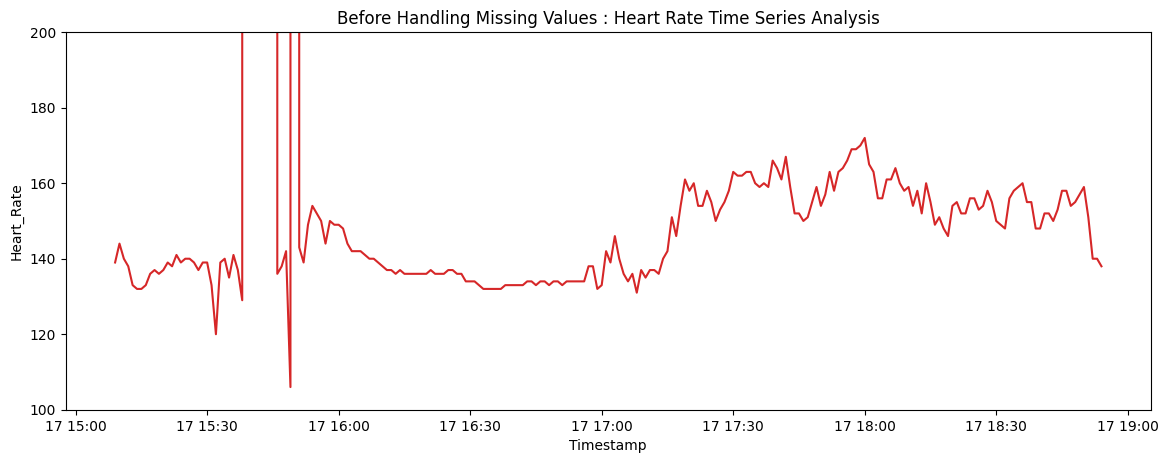

In [ ]:
# Draw line Plot
def plot_df(x, y, title="", xlabel='Timestamp', ylabel='Heart_Rate', dpi=100):
    plt.figure(figsize=(14,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.ylim(100, 200)

plot_df(x=df[input_date_variable], y=df[input_target_variable], title='Before Handling Missing Values : Heart Rate Time Series Analysis')

In [ ]:
df = df.replace({'Heart_Rate':{61441:np.nan, 61442:np.nan}, 'Lifetouch Respiration Rate':{61441:np.nan, 61442:np.nan}})

In [ ]:
df.isnull().sum()

Timestamp                     0
Heart_Rate                    8
Lifetouch Respiration Rate    8
Oximeter SpO2                 0
Oximeter Pulse                0
dtype: int64

In [ ]:
df = df.ffill()

In [ ]:
df.isnull().sum()

Timestamp                     0
Heart_Rate                    0
Lifetouch Respiration Rate    0
Oximeter SpO2                 0
Oximeter Pulse                0
dtype: int64

In [ ]:
df.to_csv('data.csv')

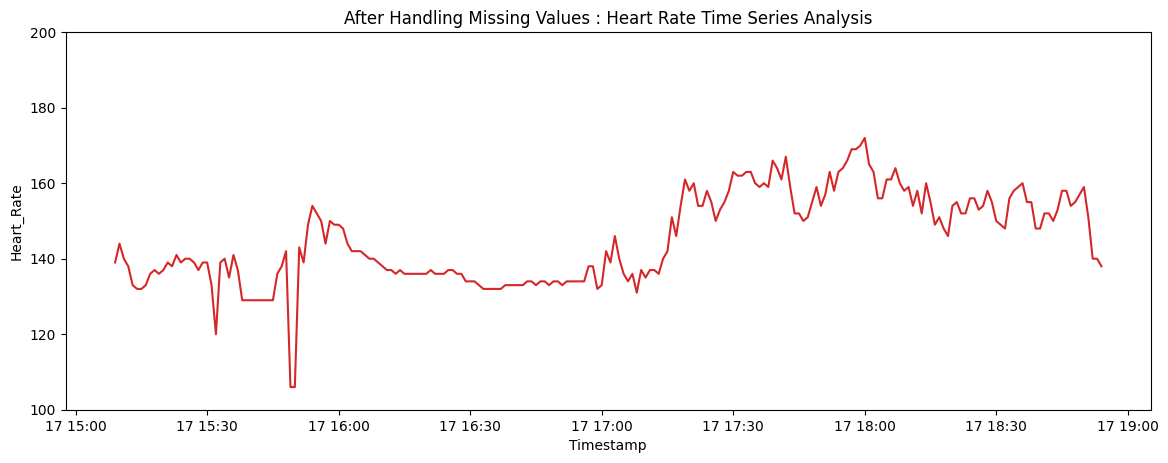

In [ ]:
# Draw line Plot
def plot_df(x, y, title="", xlabel='Timestamp', ylabel='Heart_Rate', dpi=100):
    plt.figure(figsize=(14,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.ylim(100, 200)

plot_df(x=df[input_date_variable], y=df[input_target_variable], title='After Handling Missing Values : Heart Rate Time Series Analysis')

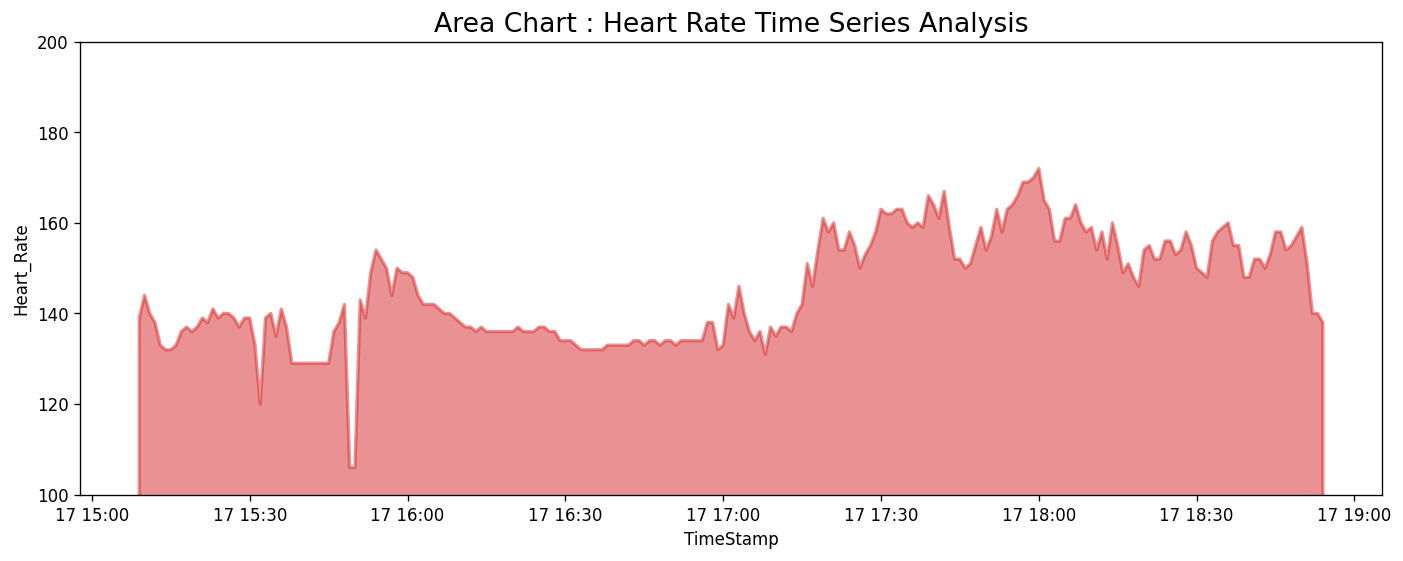

In [ ]:
# Draw plot
x = df[input_date_variable]
y1 = df[input_target_variable].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(14,5), dpi= 120)
plt.fill_between(x, y1=y1, alpha=0.5, linewidth=2, color='tab:red')
plt.title('Area Chart : Heart Rate Time Series Analysis', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.Timestamp), xmax=np.max(df.Timestamp), linewidth=.5)
plt.xlabel('TimeStamp')
plt.ylabel('Heart_Rate')
plt.ylim(100, 200)
plt.show()

### Check distribution of the time series
You should check the distribution of the time series so that you can decide if you need to transform the data or can be used as it is. 

Additionally, it provides insights about the type of distribution the data follows

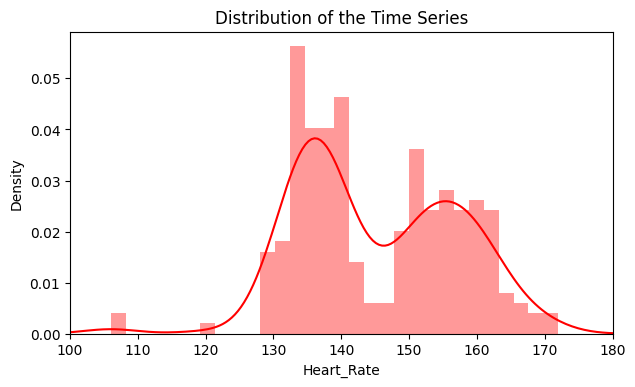

In [ ]:
plt.figure(figsize = (7,4))
sns.distplot(df[input_target_variable], kde = True, color ='red', bins = 30)
plt.title('Distribution of the Time Series', fontsize=12)
plt.xlim(100,180)
plt.show()

### Q-Q Plot to check Normal Distribution of attribute

In [ ]:
import scipy.stats as ss
import pylab

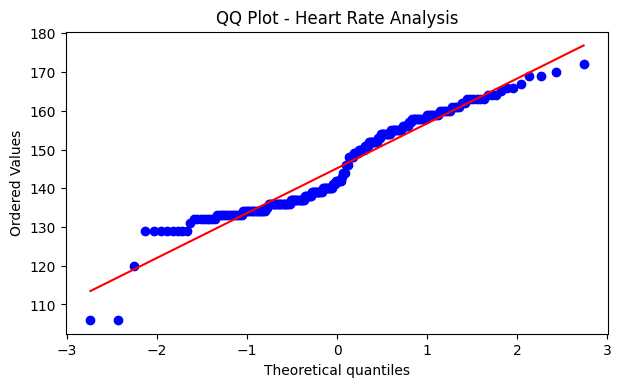

In [ ]:
pylab.figure(figsize=(7,4))
ss.probplot(df.Heart_Rate,plot = pylab)
pylab.title('QQ Plot - Heart Rate Analysis')
pylab.show()

### Time Series Decomposition
Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:

Additive time series:

Value = Base Level + Trend + Seasonality + Error

Multiplicative Time Series:

Value = Base Level x Trend x Seasonality x Error

Text(0.5, 0.98, 'Multiplicative Decompose')

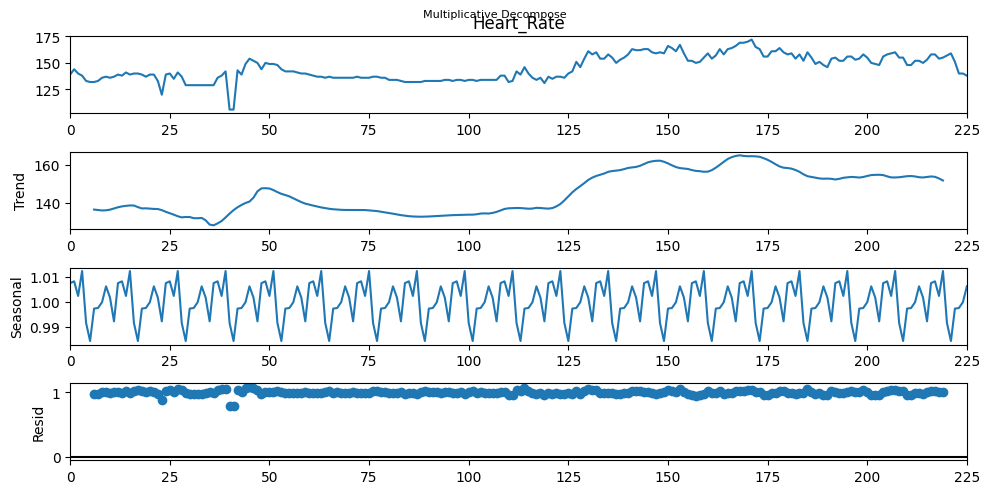

In [ ]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df[input_target_variable], model='multiplicative', period=input_seasonality)

# Additive Decomposition
result_add = seasonal_decompose(df[input_target_variable], model='additive', period=input_seasonality)

# Plot
plt.rcParams.update({'figure.figsize': (10,5)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=8)


Text(0.5, 0.98, 'Additive Decompose')

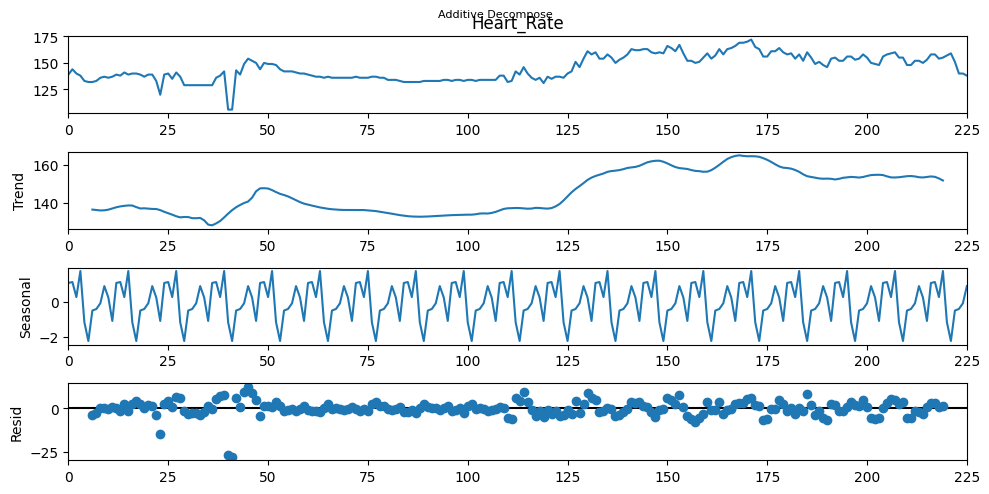

In [ ]:
result_add.plot().suptitle('Additive Decompose', fontsize=8)

### Stationarity test - Augmented Dickey Fuller test (ADH Test)
There are mulitple tests to test if a time series is stationary or not.

The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.

In [ ]:
# ADF Test
result = adfuller(df[input_target_variable].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.0062983264332157
p-value: 0.28381834919001564
Critial Values:
   1%, -3.4602906385073884
Critial Values:
   5%, -2.874708679520702
Critial Values:
   10%, -2.573788599127782


In [ ]:
# check stationarity of the series
import statsmodels.api as sm

def check_stationarity(series):
  statistic, p_value, n_lags, critical_values = sm.tsa.stattools.kpss(series)
  print(f'p value: {p_value}')
  print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary \n')

In [ ]:
check_stationarity(df['Heart_Rate'])

p value: 0.01
Result: The series is not stationary 



Since the p-value obtained 0.28 is greater than significance level 0.05, we accept the null hypothesis i.e., time series is not stationary.


### ACF-PACF plots and Find the order of differencing
How to find the order of differencing?

The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.

In the event, you can’t really decide between two orders of differencing, then go with the order that gives the least standard deviation in the differenced series.

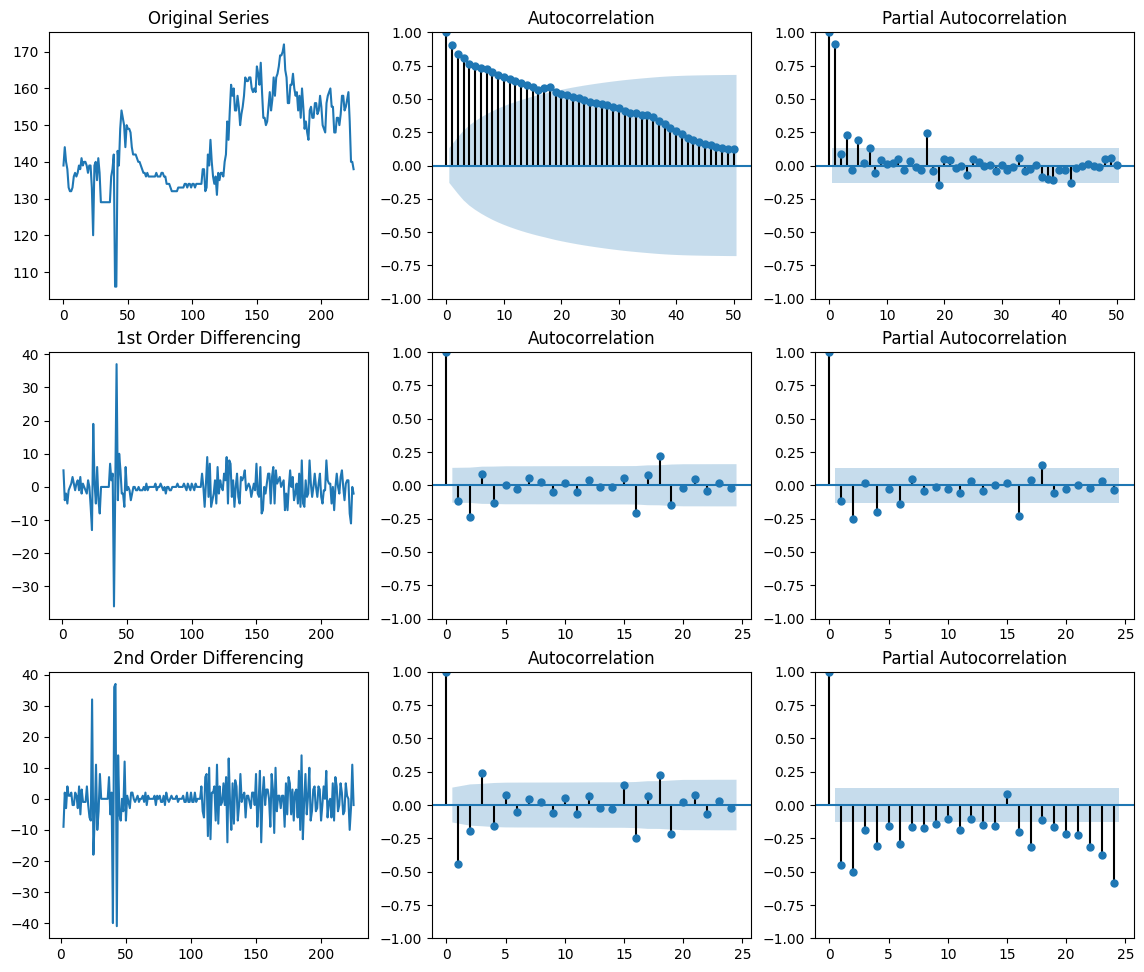

In [ ]:
# Original Series

fig, axes = plt.subplots(3, 3, figsize=(14,12), dpi= 100)
axes[0, 0].plot(df[input_target_variable]);
axes[0, 0].set_title('Original Series')
plot_acf(df[input_target_variable],lags=50, ax=axes[0, 1])
plot_pacf(df[input_target_variable], lags=50, ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(df[input_target_variable].diff()); 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df[input_target_variable].diff().dropna(), ax=axes[1, 1])
plot_pacf(df[input_target_variable].diff().dropna(), ax=axes[1, 2])


# 2nd Differencing
axes[2, 0].plot(df[input_target_variable].diff().diff()); 
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df[input_target_variable].diff().diff().dropna(), ax=axes[2, 1])
plot_pacf(df[input_target_variable].diff().diff().dropna(), ax=axes[2, 2])

plt.show();

In [ ]:
# ADF Test for 1 order of differencing
result = adfuller(df[input_target_variable].diff().dropna().values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -8.370466584275603
p-value: 2.67086003824761e-13
Critial Values:
   1%, -3.460567372610299
Critial Values:
   5%, -2.874829809033386
Critial Values:
   10%, -2.573853225954421


In [ ]:
# ADF Test for 2 order of differencing
result = adfuller(df[input_target_variable].diff().diff().dropna().values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -5.9324288311508155
p-value: 2.3633341725558015e-07
Critial Values:
   1%, -3.4621857592784546
Critial Values:
   5%, -2.875537986778846
Critial Values:
   10%, -2.574231080806213


## Model Building
In this section you will:

- Split data in train-test dataset
- Model 1 - ARIMA
- Model 2 - Simple Exponential Smoothing
- Model 3 - Holt-Winters
- Define function to evaluate models
- Train and evaluate the model


In [ ]:
df.head()

,Timestamp,Heart_Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,2015-08-17 15:09:00,139.0,41.0,92.0,140.0
1,2015-08-17 15:10:00,144.0,40.0,92.0,140.0
2,2015-08-17 15:11:00,140.0,42.0,89.0,144.0
3,2015-08-17 15:12:00,138.0,45.0,93.0,141.0
4,2015-08-17 15:13:00,133.0,42.0,94.0,134.0


## Train - Test Window Split
Split the dataset in training and test set



In [ ]:
train_pct = 0.80
train_size = int(len(df) * train_pct)
test_size = len(df) - train_size
train, test = df[0:train_size], df[train_size:]

In [ ]:
print('Train Data :',train.shape)
print('Test Data :',test.shape)

Train Data : (180, 5)
Test Data : (46, 5)


In [ ]:
def model_auto_sarimax(y, seasonality, seasonal_flag, exogenous_variable):
    
    # Train model
    model = pm.auto_arima(train[input_target_variable], exogenous=exogenous_variable, 
                          start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = input_seasonality, 
                          start_P = 0, seasonal = True, 
                          d = None, max_D = 1, trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  stepwise = True, 
                          max_order=12)
    
    # Model summary 
    print(model.summary())
    
    # Model diagnostics
    model.plot_diagnostics(figsize=(10,7))
    plt.show()
    
    return model

In [ ]:
def model_simple_exponential_smoothing(y):
    
    # Train model
    model = SimpleExpSmoothing(np.asarray(y)).fit(smoothing_level=0.6,optimized=False)
    
    # Model summary 
    print(model.summary())
    
    return model

In [ ]:
def model_holt_winters(y, seasonality):
    
    # Train model
    model = ExponentialSmoothing(np.asarray(y) ,seasonal_periods=seasonality ,trend='add', seasonal='add',).fit()
    
    # Model summary 
    print(model.summary())
    
    return model

In [ ]:
def get_predictions(input_ts_algo, model, train, test, input_target_variable, exogenous_variable = None):
    
    print("------------- Get Predictions --------------- \n")
    # Get prediction for test duration
    if input_ts_algo == "manual_sarima":
        predictions = pd.Series(model.predict(len(train) + 1, len(train) + len(test), typ = 'levels').rename("Predictions")).reset_index(drop = True)
    elif input_ts_algo in ["auto_arima", "auto_sarima", "auto_sarimax"]:
        predictions = pd.Series(model.predict(len(test), exogenous = exogenous_variable)).reset_index(drop = True)
    else:
        predictions = pd.Series(model.forecast(len(test))).reset_index(drop = True)
    return predictions

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
def analyse_error(actuals, predictions):
    validation_df = pd.DataFrame({"actual" : actuals, "prediction" : predictions})
    validation_df["error"] = validation_df.actual - validation_df.prediction
    
    plt.scatter(validation_df.actual, validation_df.error)
    plt.xlabel("Actual")
    plt.ylabel("Errors")
    plt.title('Residual Error Analysis')
    plt.show()

In [ ]:
def evaluate_model(actuals, predictions, input_target_variable = input_target_variable):
    
    print("------------- Model Evaluations --------------- \n")
    
    print("MAPE : ", mean_absolute_percentage_error(actuals, predictions))
    print("MAE  : ", mean_absolute_error(actuals, predictions))
    print("RMSE  : ", mean_squared_error(actuals, predictions, squared=False))
    print("R2 Score  : ", r2_score(actuals, predictions))

    
    analyse_error(actuals, predictions)
  
    # Plot actual vs predicted
    predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = input_target_variable,  figsize=(10, 7)) 
    actuals.plot(legend = True, label = "Actual");
    plt.title("Actual vs Predicted", fontsize = 12)

------------- Auto ARIMA --------------- 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[60] intercept   : AIC=1097.296, Time=2.44 sec
 ARIMA(0,1,0)(0,0,0)[60] intercept   : AIC=1110.876, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[60] intercept   : AIC=1110.646, Time=1.60 sec
 ARIMA(0,1,1)(0,0,1)[60] intercept   : AIC=1107.119, Time=2.13 sec
 ARIMA(0,1,0)(0,0,0)[60]             : AIC=1108.963, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[60] intercept   : AIC=1096.204, Time=0.17 sec
 ARIMA(1,1,1)(1,0,0)[60] intercept   : AIC=1097.305, Time=4.95 sec
 ARIMA(1,1,1)(1,0,1)[60] intercept   : AIC=1099.295, Time=8.29 sec
 ARIMA(0,1,1)(0,0,0)[60] intercept   : AIC=1106.166, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[60] intercept   : AIC=1109.600, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[60] intercept   : AIC=1095.869, Time=0.33 sec
 ARIMA(2,1,1)(1,0,0)[60] intercept   : AIC=1096.760, Time=10.17 sec
 ARIMA(2,1,1)(0,0,1)[60] intercept   : AIC=1096.701, Time=10.55 sec
 ARIMA(2,1,1)(1,0,1)[60] intercept   : AI

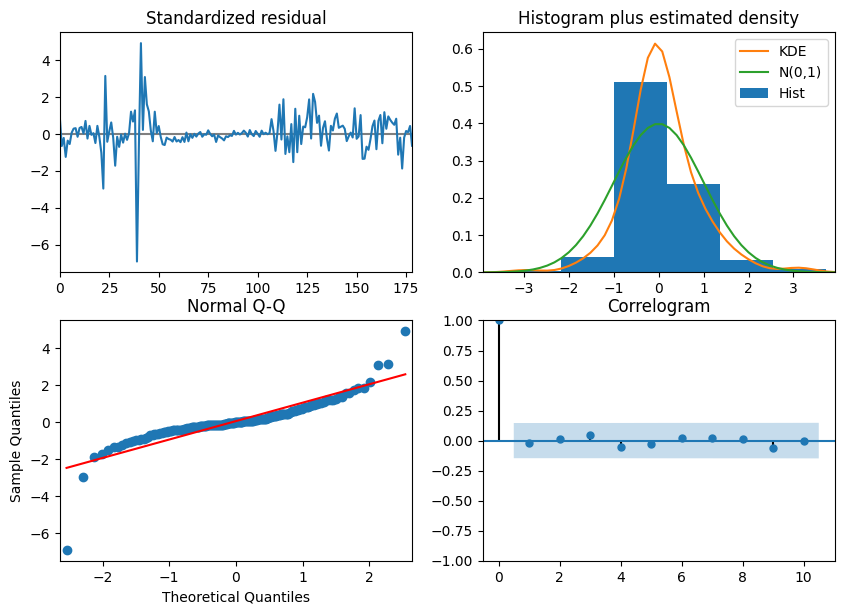

------------- Get Predictions --------------- 

------------- Model Evaluations --------------- 

MAPE :  5.4264433115771435
MAE  :  8.114553890244535
RMSE  :  9.604260667860745
R2 Score  :  -2.5300531255457392


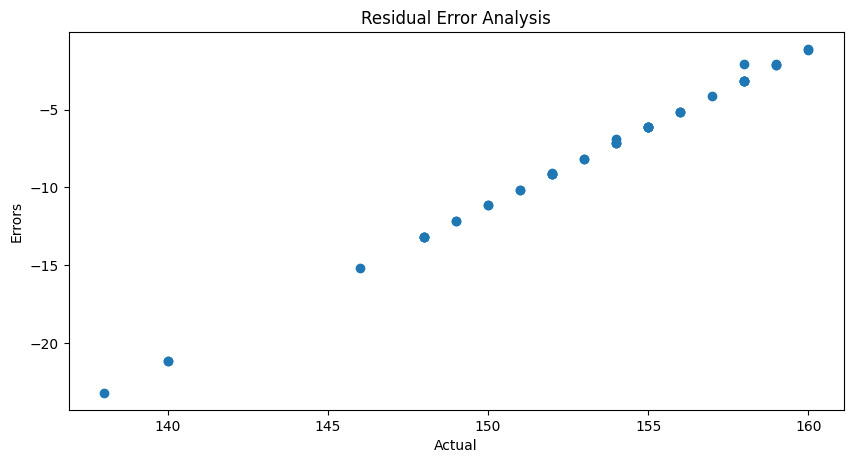

0     160.070764
1     161.090063
2     160.864296
3     161.198236
4     161.055973
5     161.181806
6     161.112510
7     161.163700
8     161.132376
9     161.153954
10    161.140170
11    161.149405
12    161.143403
13    161.147380
14    161.144776
15    161.146494
16    161.145367
17    161.146109
18    161.145621
19    161.145942
dtype: float64


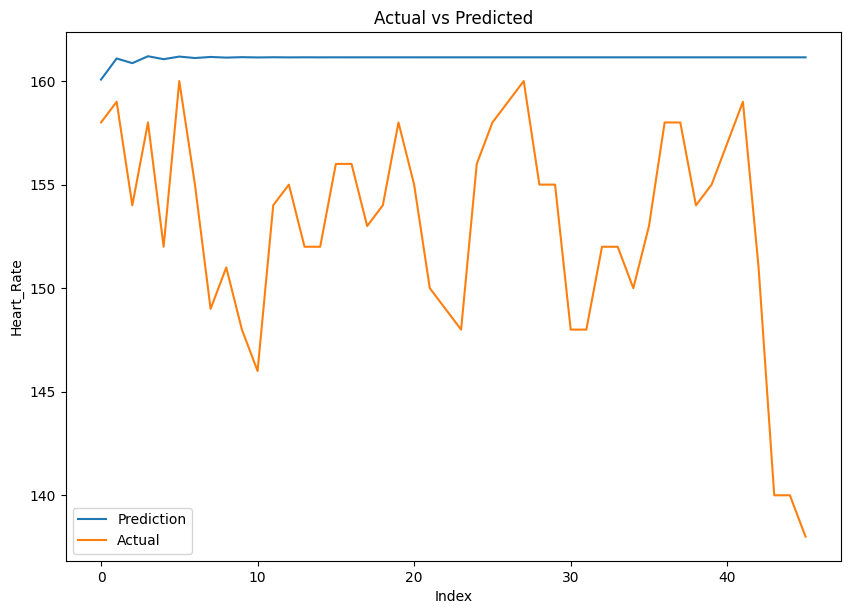

In [ ]:
# Get actual values
actuals = test[input_target_variable].reset_index(drop = True)

# Select the algorithm according to the input provided
if input_ts_algo == 'auto_arima':
    
    print("------------- Auto ARIMA --------------- \n")
    model = model_auto_sarimax(y = train[input_target_variable], seasonality = input_seasonality, seasonal_flag = False, exogenous_variable = None)
    predictions = get_predictions(input_ts_algo, model, train, test, input_target_variable)
    evaluate_model(actuals, predictions)
    print(predictions[:20])
    
elif input_ts_algo == 'auto_sarima':
    
    print("------------- Auto SARIMA --------------- \n")
    model = model_auto_sarimax(y = train[input_target_variable], seasonality = input_seasonality, seasonal_flag = True, exogenous_variable = None)
    predictions = get_predictions(input_ts_algo, model, train, test, input_target_variable, exogenous_variable = None)
    evaluate_model(actuals, predictions)
    
elif input_ts_algo == 'auto_sarimax':
    
    print("------------- Auto SARIMAX --------------- \n")
    model = model_auto_sarimax(y = train[input_target_variable], seasonality = input_seasonality, seasonal_flag = False, exogenous_variable = train[input_exogenous_variable].values.reshape(-1, 1))
    predictions = get_predictions(input_ts_algo, model, train, test, input_target_variable, exogenous_variable = train[input_exogenous_variable].values.reshape(-1, 1))
    evaluate_model(actuals, predictions)


elif input_ts_algo == 'simple_exponential_smoothing':
    
    print("------------- Simple Exponential Smoothing --------------- \n")
    model = model_simple_exponential_smoothing(y = train[input_target_variable])
    predictions = get_predictions(input_ts_algo, model, train, test, input_target_variable, exogenous_variable = None)
    evaluate_model(actuals, predictions)
    
elif input_ts_algo == 'holt_winters':
    
    print("------------- Holt Winters --------------- \n")
    model = model_holt_winters(y = train[input_target_variable], seasonality = input_seasonality)
    predictions = get_predictions(input_ts_algo, model, train, test, input_target_variable, exogenous_variable = None)
    evaluate_model(actuals, predictions)

In [ ]:
input_ts_algo = 'simple_exponential_smoothing'

In [ ]:
def model_simple_exponential_smoothing(y):
    
    # Train model
    model = SimpleExpSmoothing(np.asarray(y)).fit(smoothing_level=0.6,optimized=True)
    
    # Model summary 
    print(model.summary())
    
    return model

In [ ]:
def get_predictions(input_ts_algo, model, train, test, input_target_variable, exogenous_variable = None):
    
    print("------------- Get Predictions --------------- \n")
    # Get prediction for test duration
    if input_ts_algo == "manual_sarima":
        predictions = pd.Series(model.predict(len(train) + 1, len(train) + len(test), typ = 'levels').rename("Predictions")).reset_index(drop = True)
    elif input_ts_algo in ["auto_arima", "auto_sarima", "auto_sarimax"]:
        predictions = pd.Series(model.predict(len(test), exogenous = exogenous_variable)).reset_index(drop = True)
    else:
        predictions = pd.Series(model.forecast(len(test))).reset_index(drop = True)
    return predictions

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
def analyse_error(actuals, predictions):
    validation_df = pd.DataFrame({"actual" : actuals, "prediction" : predictions})
    validation_df["error"] = validation_df.actual - validation_df.prediction
    
    plt.scatter(validation_df.actual, validation_df.error)
    plt.xlabel("Actual")
    plt.ylabel("Errors")
    plt.title('Residual Error Analysis')
    plt.show()

In [ ]:
def evaluate_model(actuals, predictions, input_target_variable = input_target_variable):
    
    print("------------- Model Evaluations --------------- \n")
    
    print("MAPE : ", mean_absolute_percentage_error(actuals, predictions))
    print("MAE  : ", mean_absolute_error(actuals, predictions))
    print("RMSE  : ", mean_squared_error(actuals, predictions, squared=False))
    print("R2 Score  : ", r2_score(actuals, predictions))

    
    analyse_error(actuals, predictions)
  
    # Plot actual vs predicted
    predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = input_target_variable,  figsize=(10, 7)) 
    actuals.plot(legend = True, label = "Actual");
    plt.title("Actual vs Predicted", fontsize = 12)

------------- Simple Exponential Smoothing --------------- 

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  endog   No. Observations:                  180
Model:             SimpleExpSmoothing   SSE                           4944.714
Optimized:                       True   AIC                            600.361
Trend:                           None   BIC                            606.747
Seasonal:                        None   AICC                           600.590
Seasonal Periods:                None   Date:                 Tue, 15 Feb 2022
Box-Cox:                        False   Time:                         23:20:04
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.6000000                alpha             

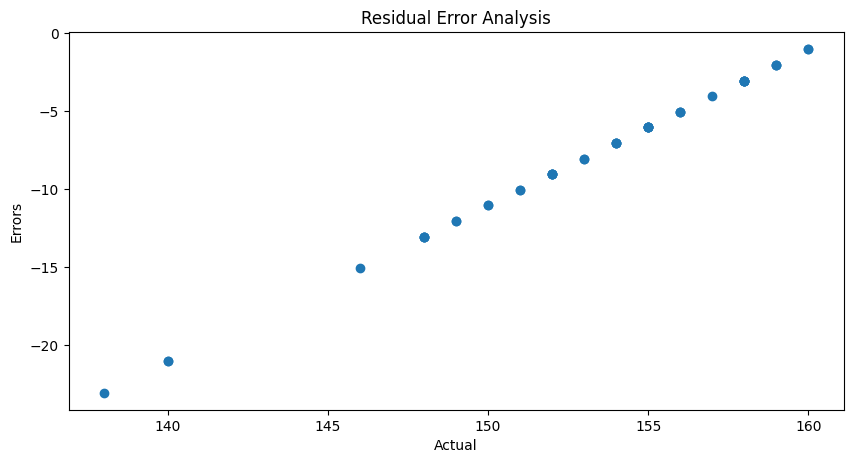

0     161.027836
1     161.027836
2     161.027836
3     161.027836
4     161.027836
5     161.027836
6     161.027836
7     161.027836
8     161.027836
9     161.027836
10    161.027836
11    161.027836
12    161.027836
13    161.027836
14    161.027836
15    161.027836
16    161.027836
17    161.027836
18    161.027836
19    161.027836
dtype: float64


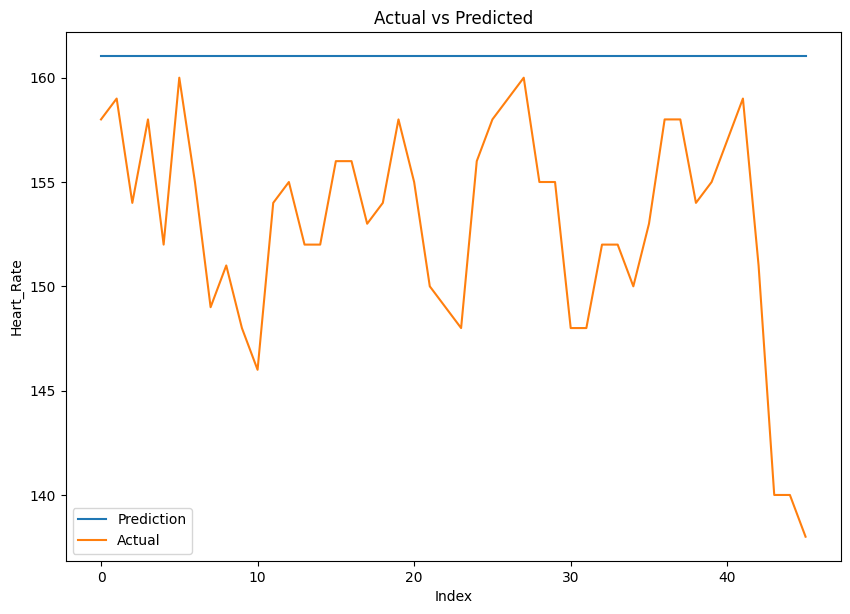

In [ ]:
# Get actual values
actuals = test[input_target_variable].reset_index(drop = True)

# Select the algorithm according to the input provided
if input_ts_algo == 'auto_arima':
    
    print("------------- Auto ARIMA --------------- \n")
    model = model_auto_sarimax(y = train[input_target_variable], seasonality = input_seasonality, seasonal_flag = False, exogenous_variable = None)
    predictions = get_predictions(input_ts_algo, model, train, test, input_target_variable)
    evaluate_model(actuals, predictions)
    print(predictions[:20])
    
elif input_ts_algo == 'auto_sarima':
    
    print("------------- Auto SARIMA --------------- \n")
    model = model_auto_sarimax(y = train[input_target_variable], seasonality = input_seasonality, seasonal_flag = True, exogenous_variable = None)
    predictions = get_predictions(input_ts_algo, model, train, test, input_target_variable, exogenous_variable = None)
    evaluate_model(actuals, predictions)
    
elif input_ts_algo == 'auto_sarimax':
    
    print("------------- Auto SARIMAX --------------- \n")
    model = model_auto_sarimax(y = train[input_target_variable], seasonality = input_seasonality, seasonal_flag = False, exogenous_variable = train[input_exogenous_variable].values.reshape(-1, 1))
    predictions = get_predictions(input_ts_algo, model, train, test, input_target_variable, exogenous_variable = train[input_exogenous_variable].values.reshape(-1, 1))
    evaluate_model(actuals, predictions)


elif input_ts_algo == 'simple_exponential_smoothing':
    
    print("------------- Simple Exponential Smoothing --------------- \n")
    model = model_simple_exponential_smoothing(y = train[input_target_variable])
    predictions = get_predictions(input_ts_algo, model, train, test, input_target_variable, exogenous_variable = None)
    evaluate_model(actuals, predictions)
    print(predictions[:20])
    
elif input_ts_algo == 'holt_winters':
    
    print("------------- Holt Winters --------------- \n")
    model = model_holt_winters(y = train[input_target_variable], seasonality = input_seasonality)
    predictions = get_predictions(input_ts_algo, model, train, test, input_target_variable, exogenous_variable = None)
    evaluate_model(actuals, predictions)

In [ ]:
input_ts_algo = 'holt_winters'

In [ ]:
def model_holt_winters(y, seasonality):
    
    # Train model
    model = ExponentialSmoothing(np.asarray(y) ,seasonal_periods=seasonality ,trend='add', seasonal='add',).fit()
    
    # Model summary 
    print(model.summary())
    
    return model

In [ ]:
def get_predictions(input_ts_algo, model, train, test, input_target_variable, exogenous_variable = None):
    
    print("------------- Get Predictions --------------- \n")
    # Get prediction for test duration
    if input_ts_algo == "manual_sarima":
        predictions = pd.Series(model.predict(len(train) + 1, len(train) + len(test), typ = 'levels').rename("Predictions")).reset_index(drop = True)
    elif input_ts_algo in ["auto_arima", "auto_sarima", "auto_sarimax"]:
        predictions = pd.Series(model.predict(len(test), exogenous = exogenous_variable)).reset_index(drop = True)
    else:
        predictions = pd.Series(model.forecast(len(test))).reset_index(drop = True)
    return predictions

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
def analyse_error(actuals, predictions):
    validation_df = pd.DataFrame({"actual" : actuals, "prediction" : predictions})
    validation_df["error"] = validation_df.actual - validation_df.prediction
    
    plt.scatter(validation_df.actual, validation_df.error)
    plt.xlabel("Actual")
    plt.ylabel("Errors")
    plt.title('Residual Error Analysis')
    plt.show()

In [ ]:
def evaluate_model(actuals, predictions, input_target_variable = input_target_variable):
    
    print("------------- Model Evaluations --------------- \n")
    
    print("MAPE : ", mean_absolute_percentage_error(actuals, predictions))
    print("MAE  : ", mean_absolute_error(actuals, predictions))
    print("RMSE  : ", mean_squared_error(actuals, predictions, squared=False))
    print("R2 Score  : ", r2_score(actuals, predictions))

    
    analyse_error(actuals, predictions)
  
    # Plot actual vs predicted
    predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = input_target_variable,  figsize=(10, 7)) 
    actuals.plot(legend = True, label = "Actual");
    plt.title("Actual vs Predicted", fontsize = 12)

------------- Holt Winters --------------- 

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  180
Model:             ExponentialSmoothing   SSE                           3436.368
Optimized:                         True   AIC                            658.858
Trend:                         Additive   BIC                            863.208
Seasonal:                      Additive   AICC                           737.124
Seasonal Periods:                    60   Date:                 Tue, 15 Feb 2022
Box-Cox:                          False   Time:                         23:24:50
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7192031                alpha  

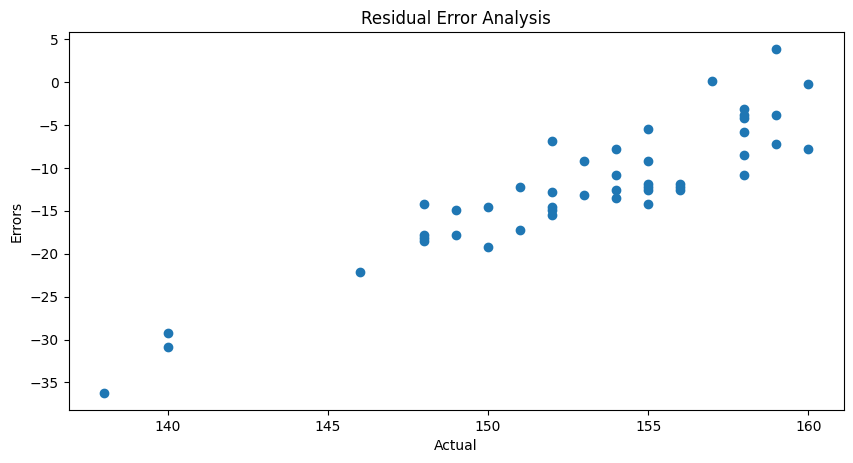

0     162.181903
1     162.848521
2     161.848740
3     161.182155
4     158.848760
5     160.181956
6     160.515111
7     163.848544
8     163.181925
9     166.181918
10    168.181912
11    167.515079
12    169.181478
13    166.514717
14    167.514625
15    168.181539
16    167.848287
17    166.181209
18    166.514565
19    166.514472
dtype: float64


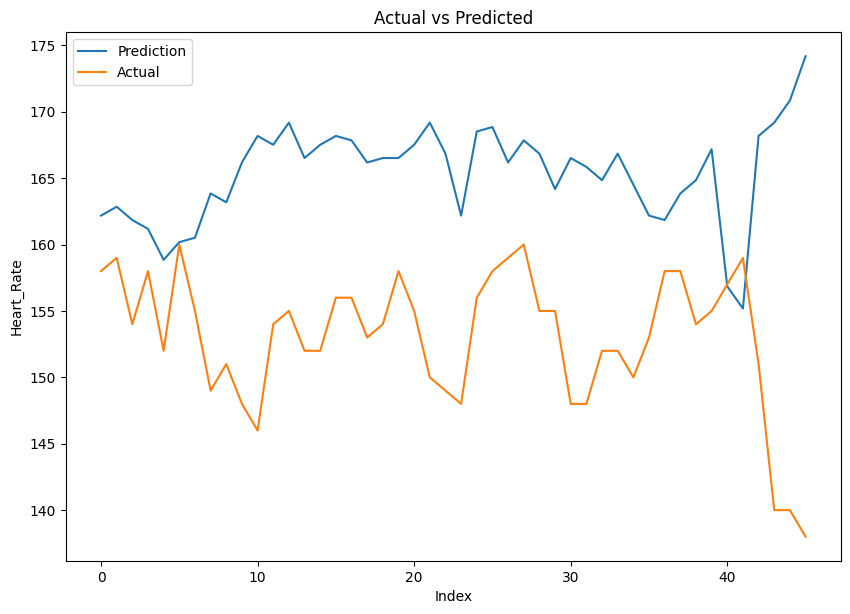

In [ ]:
# Get actual values
actuals = test[input_target_variable].reset_index(drop = True)

# Select the algorithm according to the input provided
if input_ts_algo == 'auto_arima':
    
    print("------------- Auto ARIMA --------------- \n")
    model = model_auto_sarimax(y = train[input_target_variable], seasonality = input_seasonality, seasonal_flag = False, exogenous_variable = None)
    predictions = get_predictions(input_ts_algo, model, train, test, input_target_variable)
    evaluate_model(actuals, predictions)
    print(predictions[:20])
    
elif input_ts_algo == 'auto_sarima':
    
    print("------------- Auto SARIMA --------------- \n")
    model = model_auto_sarimax(y = train[input_target_variable], seasonality = input_seasonality, seasonal_flag = True, exogenous_variable = None)
    predictions = get_predictions(input_ts_algo, model, train, test, input_target_variable, exogenous_variable = None)
    evaluate_model(actuals, predictions)
    
elif input_ts_algo == 'auto_sarimax':
    
    print("------------- Auto SARIMAX --------------- \n")
    model = model_auto_sarimax(y = train[input_target_variable], seasonality = input_seasonality, seasonal_flag = False, exogenous_variable = train[input_exogenous_variable].values.reshape(-1, 1))
    predictions = get_predictions(input_ts_algo, model, train, test, input_target_variable, exogenous_variable = train[input_exogenous_variable].values.reshape(-1, 1))
    evaluate_model(actuals, predictions)


elif input_ts_algo == 'simple_exponential_smoothing':
    
    print("------------- Simple Exponential Smoothing --------------- \n")
    model = model_simple_exponential_smoothing(y = train[input_target_variable])
    predictions = get_predictions(input_ts_algo, model, train, test, input_target_variable, exogenous_variable = None)
    evaluate_model(actuals, predictions)
    
elif input_ts_algo == 'holt_winters':
    
    print("------------- Holt Winters --------------- \n")
    model = model_holt_winters(y = train[input_target_variable], seasonality = input_seasonality)
    predictions = get_predictions(input_ts_algo, model, train, test, input_target_variable, exogenous_variable = None)
    evaluate_model(actuals, predictions)
    print(predictions[:20])